In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from src.utils import load_json

In [36]:
# Load toc

ds_toc = "sprhea_sp_folded_pt"
gs_name = "two_channel_gs_0" # fix_dot_sig_0
gs_path = f"/projects/p30041/spn1560/hiec/artifacts/model_evals/gnn/{ds_toc}_{gs_name}"
toc_path = f"{gs_path}/hp_toc.csv"
hp_toc = pd.read_csv(toc_path, sep='\t')
hp_toc.drop(columns=['Unnamed: 0'], inplace=True)
hp_split_dirs = os.listdir(gs_path)
hp_split_dirs.remove('hp_toc.csv')
hp_toc.head()

,n_epochs,pred_head,agg,d_prot,d_h_mpnn,neg_multiple,model
0,25,binary,last,1280,300,1,mpnn_dim_red
1,25,binary,last,1280,300,2,mpnn_dim_red
2,25,binary,last,1280,50,1,mpnn_dim_red
3,25,binary,last,1280,50,2,mpnn_dim_red
4,25,binary,last,1280,20,1,mpnn_dim_red


# Test scores

In [37]:
# Pull scores
tmp_scores = defaultdict(lambda : defaultdict(list))
for hsd in hp_split_dirs:
    hidx = int(hsd.split('_')[0])
    scores = load_json(f"{gs_path}/{hsd}/version_0/test_scores.json")

    for name, val in scores.items():
        tmp_scores[hidx][name].append(val)


# Get new column names
cols = set()
for elt in tmp_scores.values():
    for name in elt.keys():
        cols.add(f"{name}_mean")
        cols.add(f"{name}_std")

# Add new columns
for new in cols:
    hp_toc[new] = pd.Series(dtype='float')

# Fill df w/ scores
for hidx, scores in tmp_scores.items():
    for name, vals in scores.items():
        vals = np.array(vals)
        mean, std = vals.mean(), vals.std()
        hp_toc.loc[hidx, f"{name}_mean"] = mean
        hp_toc.loc[hidx, f"{name}_std"] = std

In [38]:
hp_toc.head()

,n_epochs,pred_head,agg,d_prot,d_h_mpnn,neg_multiple,model,f1_std,f1_mean,accuracy_mean,accuracy_std,recall_std,precision_mean,precision_std,recall_mean
0,25,binary,last,1280,300,1,mpnn_dim_red,0.000802,0.967893,0.967383,0.000796,0.001949,0.952980,0.001292,0.983285
1,25,binary,last,1280,300,2,mpnn_dim_red,0.001313,0.959180,0.972386,0.000978,0.002826,0.945584,0.004752,0.973202
2,25,binary,last,1280,50,1,mpnn_dim_red,0.000975,0.965985,0.965410,0.000912,0.003371,0.950163,0.001429,0.982354
3,25,binary,last,1280,50,2,mpnn_dim_red,0.000875,0.955584,0.969792,0.000645,0.000737,0.937074,0.002363,0.974846
4,25,binary,last,1280,20,1,mpnn_dim_red,0.000456,0.960647,0.959821,0.000457,0.001583,0.941291,0.001292,0.980819


In [39]:
print(hp_toc.columns)

Index(['n_epochs', 'pred_head', 'agg', 'd_prot', 'd_h_mpnn', 'neg_multiple',
       'model', 'f1_std', 'f1_mean', 'accuracy_mean', 'accuracy_std',
       'recall_std', 'precision_mean', 'precision_std', 'recall_mean'],
      dtype='object')


In [40]:
display_res = hp_toc[['agg', 'pred_head', 'd_h_mpnn', 'neg_multiple', 'f1_mean', 'precision_mean', 'recall_mean', 'accuracy_mean', 'f1_std', 'precision_std', 'recall_std', 'accuracy_std']]
display_res.sort_values(by=['f1_mean'], ascending=False)

,agg,pred_head,d_h_mpnn,neg_multiple,f1_mean,precision_mean,recall_mean,accuracy_mean,f1_std,precision_std,recall_std,accuracy_std
6,mean,binary,300,1,0.971502,0.957008,0.986445,0.971064,0.000660,0.001041,0.002026,0.000640
8,mean,binary,50,1,0.969427,0.952973,0.986464,0.968890,0.000622,0.001109,0.001836,0.000611
0,last,binary,300,1,0.967893,0.952980,0.983285,0.967383,0.000802,0.001292,0.001949,0.000796
2,last,binary,50,1,0.965985,0.950163,0.982354,0.965410,0.000975,0.001429,0.003371,0.000912
7,mean,binary,300,2,0.965253,0.951034,0.979906,0.976484,0.000512,0.001230,0.000868,0.000358
18,mean,dot_sig,300,1,0.964045,0.959288,0.968854,0.963867,0.000536,0.000701,0.001787,0.000492
10,mean,binary,20,1,0.963924,0.945330,0.983267,0.963200,0.000710,0.001265,0.001001,0.000736
20,mean,dot_sig,50,1,0.963683,0.956062,0.971430,0.963392,0.000477,0.000539,0.001447,0.000446
12,last,dot_sig,300,1,0.961843,0.958244,0.965475,0.961702,0.002399,0.001502,0.003883,0.002353
14,last,dot_sig,50,1,0.961563,0.956662,0.966516,0.961364,0.002263,0.002661,0.002080,0.002289


In [41]:
binary = display_res.loc[display_res['pred_head'] == 'binary']

In [35]:
# dot_sig = display_res.copy()

In [8]:
tmp_scores

defaultdict(<function __main__.<lambda>()>,
            {6: defaultdict(list,
                         {'f1': [0.9743617452384169,
                           0.9747136373460126,
                           0.9744852404015261],
                          'precision': [0.9608887941599616,
                           0.9611593585167031,
                           0.9623770842240273],
                          'recall': [0.9882178868917142,
                           0.988655669425111,
                           0.9869019564859977],
                          'accuracy': [0.9739971503726436,
                           0.9743519482654683,
                           0.9741601359127527]}),
             2: defaultdict(list,
                         {'f1': [0.969505953343031,
                           0.9665791681324927,
                           0.9693489688637282],
                          'precision': [0.9534279961852283,
                           0.9547204105634556,
                        

# Loss curves

In [9]:
loss_curves = defaultdict(lambda: defaultdict()) # 'hpidx_sidx': {epochs: [int], losses: [float])
for hsd in hp_split_dirs:
    hidx = int(hsd.split('_')[0])
    lc = pd.read_csv(f"{gs_path}/{hsd}/version_0/metrics.csv", sep=',')
    ep_ave_lc = lc.groupby('epoch').agg('mean').reset_index() # Average over epochs
    loss_curves[hsd]['epochs'] = ep_ave_lc.loc[:, 'epoch'].to_numpy()
    loss_curves[hsd]['losses'] = ep_ave_lc.loc[:, 'train_loss'].to_numpy()



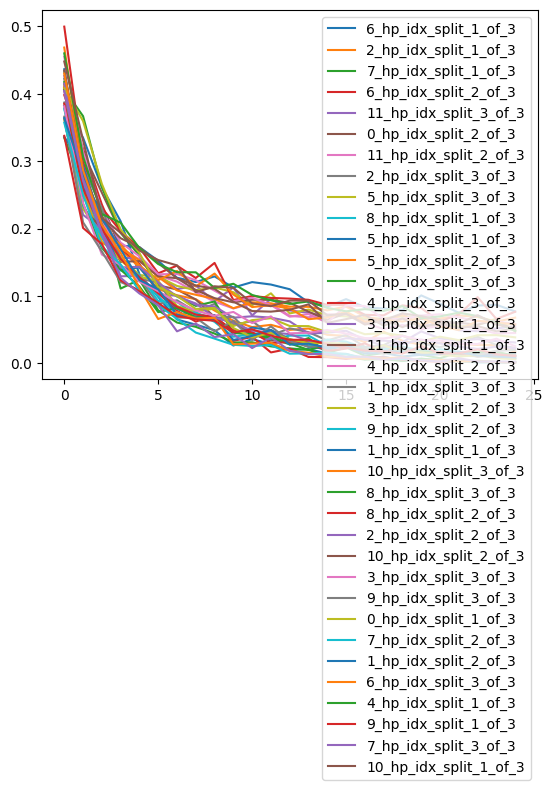

In [10]:
fig, ax = plt.subplots()
for k,v in loss_curves.items():
    ax.plot(v['epochs'], v['losses'], label=k)

ax.legend()
plt.show()

In [11]:
bad_lc = {k:v for k,v in loss_curves.items() if v['losses'][-1] > 0.4}
sorted(bad_lc.keys())

[]

In [60]:
# Collect dot sig and binaryffn

combo = pd.concat([dot_sig, binary])
combo = combo.loc[(combo['agg'] == 'last') & (combo['neg_multiple'] == 2)]

In [61]:
combo.head()

,agg,pred_head,d_h_mpnn,neg_multiple,f1_mean,precision_mean,recall_mean,accuracy_mean,f1_std,precision_std,recall_std,accuracy_std
1,last,dot_sig,300,2,0.963380,0.949035,0.978170,0.975211,0.000979,0.002331,0.000479,0.000700
3,last,dot_sig,50,2,0.957777,0.940193,0.976033,0.971314,0.001023,0.001957,0.000026,0.000724
5,last,dot_sig,20,2,0.945298,0.924433,0.967137,0.962686,0.003253,0.004915,0.002072,0.002285
1,last,binary,300,2,0.959180,0.945584,0.973202,0.972386,0.001313,0.004752,0.002826,0.000978
3,last,binary,50,2,0.955584,0.937074,0.974846,0.969792,0.000875,0.002363,0.000737,0.000645


In [62]:
metrics = [
    'f1',
    'precision',
    'recall',
    'accuracy'
]

cluster_conditions = [
    'binary',
    'dot_sig'
]

x_conditions = [
    20,
    50,
    300
]

cluster_col = 'pred_head'
x_col = 'd_h_mpnn'

'''
cluster_condition: {x_idx_condition: (mean, std)}

'''
scores = defaultdict(lambda : defaultdict(lambda : defaultdict(tuple)))
for cc in cluster_conditions:
    for xc in x_conditions:
        for m in metrics:
            mean = combo.loc[(combo[cluster_col] == cc) & (combo[x_col] == xc), f"{m}_mean"].to_numpy()[0]
            std = combo.loc[(combo[cluster_col] == cc) & (combo[x_col] == xc), f"{m}_std"].to_numpy()[0]
            scores[cc][xc][m] = (mean, std)

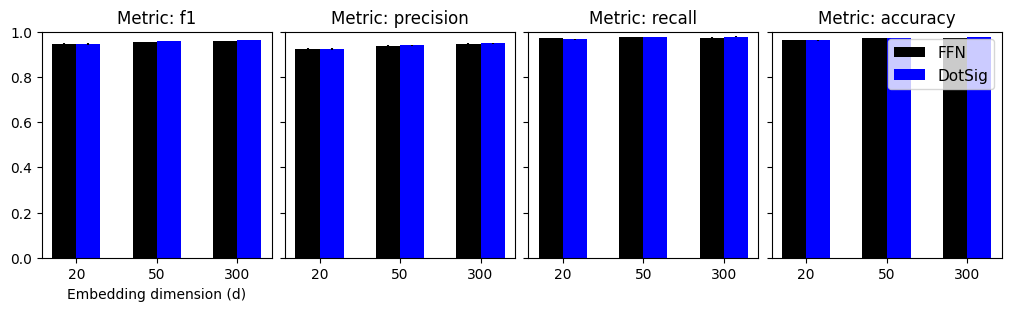

In [63]:
# Plot esm vs full at all ds tried

# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np


cluster_condition_names = ["FFN", "DotSig"]
colors = ['black', 'blue']

x = np.arange(len(x_conditions))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(ncols=4, sharey=True, figsize=(10,3), constrained_layout=True)

for i, m in enumerate(metrics):
# for i, d  in enumerate(ds):
    for j, name in enumerate(scores.keys()):
        data = [scores[name][d][m] for d in x_conditions]
        # x = list(data.keys())
        mu, sig = list(zip(*data))
        offset = width * (j - 0.5)
        rects = ax[i].bar(x + offset, mu, yerr=sig, width=width, label=cluster_condition_names[j], color=colors[j])
        ax[i].set_xticks(x)
        ax[i].set_xticklabels(x_conditions)
        ax[i].set_title(f"Metric: {m}")

ax[-1].legend(loc='upper right', fontsize=11)
ax[0].set_ylim(0,1)
ax[0].set_xlabel("Embedding dimension (d)")


plt.show()

In [64]:
scratch_dir = '/scratch/spn1560'
test_path = f"{scratch_dir}/sprhea_sp_folded_pt_3_splits_1234_seed_1_neg_multiple_0_split_idx_test.npy"
train_path = f"{scratch_dir}/sprhea_sp_folded_pt_3_splits_1234_seed_1_neg_multiple_0_split_idx_train.npy"

train_data = np.load(train_path)
test_data = np.load(test_path)

In [70]:

for i in range(len(test_data)):
    for j in range(len(train_data)):
        embeds_equal = all(test_data['sample_embed'][i] == train_data['sample_embed'][j])
        rxns_equal = test_data['feature'][i] == train_data['feature'][j]
        if embeds_equal and rxns_equal:
            print((i, j))



(6642, 59216)
(17534, 15195)
